# Partie 1 :

In [1]:
#Yassine Karimi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Dataset 
#### Chargement du dataset Occupancy pour réaliser un modèle mathématique de régression linéaire (from scratch) pour la prédiction de l’émission de CO2 en fonction de 'Temperature', ' Humidity ', 'Light' et ‘HumidityRatio’.

In [2]:
#Yassine Karimi

dataset=pd.read_csv("occupancy.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'occupancy.csv'

In [3]:
#Yassine Karimi
dataset

NameError: name 'dataset' is not defined

In [48]:
#Yassine Karimi
dataset.head()


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


c:\Users\HP\.conda\envs\openvino_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


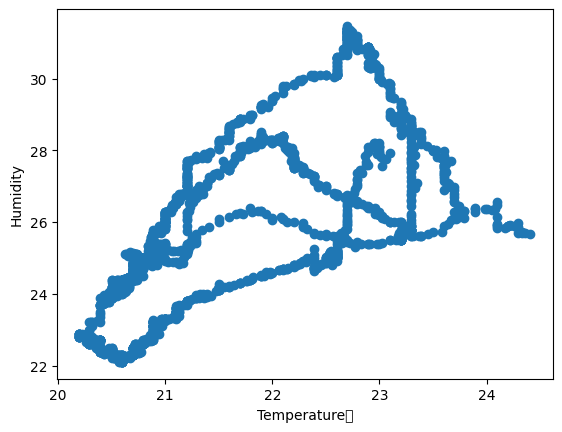

In [49]:
#Yassine Karimi
plt.plot(dataset["Temperature"],dataset["Humidity"],'o')
plt.xlabel('Temperature	')
plt.ylabel('Humidity')
plt.show()

In [50]:
#Yassine Karimi

df=dataset[['Temperature','Humidity','Light','HumidityRatio','CO2']]


In [51]:
#Yassine Karimi

df.isnull().values.sum()


# ---> pas des valeur null donc on est pas besoin de faire l'imputaion des donnees.



0

In [52]:
#Yassine Karimi

# Correlations of features with target variable
correlations = df.corr()
correlations['CO2']


# on peut voir clairement qu'il s'agit bien d'une forte correlation entre les features et notre variable target et ça , va d'etre plus claire dans la matrice de correlation dans la cellule suivante 

Temperature      0.870226
Humidity         0.911611
Light            0.769167
HumidityRatio    0.964440
CO2              1.000000
Name: CO2, dtype: float64

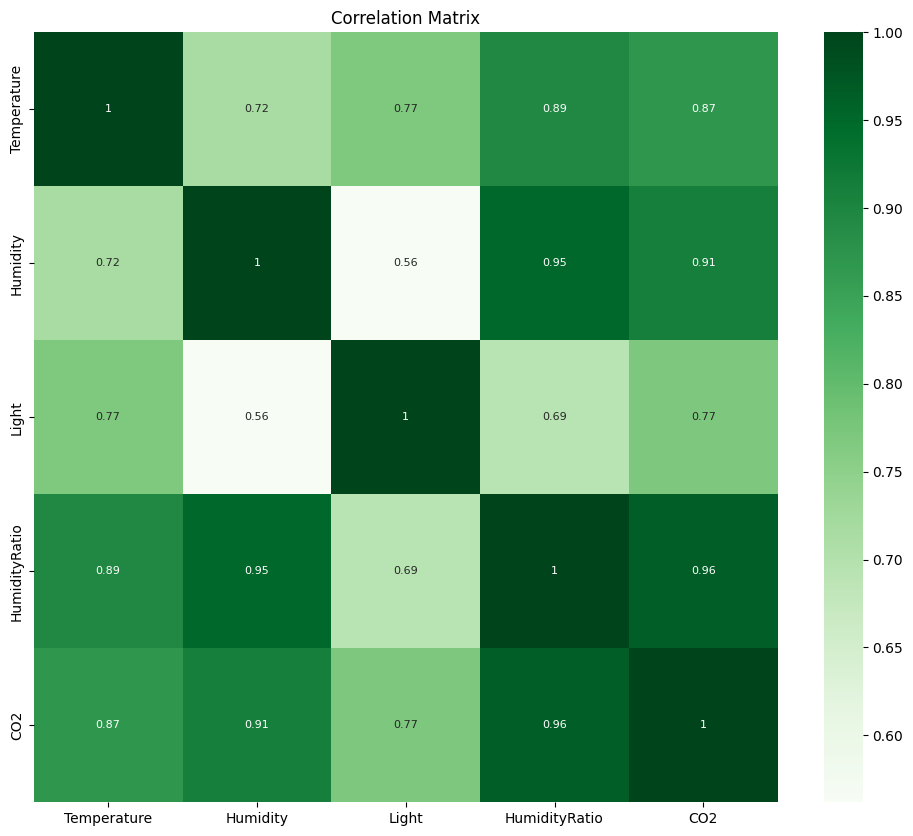

In [53]:
#Yassine Karimi
# Plot Pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Correlation Matrix')
plt.show()

In [54]:
# Determine the highest intercorrelations
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,Temperature,Humidity,Light,HumidityRatio,CO2
Temperature,1.0,-,0.768428,0.894548,0.870226
Humidity,-,1.0,-,0.951914,0.911611
Light,0.768428,-,1.0,-,0.769167
HumidityRatio,0.894548,0.951914,-,1.0,0.964440
CO2,0.870226,0.911611,0.769167,0.96444,1.000000


In [55]:
#Yassine Karimi

X= df[['Temperature','Humidity','Light','HumidityRatio']]
y=df['CO2']

In [56]:
#Yassine Karimi
y.shape

(2665,)

In [13]:
#Yassine Karimi
X.shape

(2665, 4)

Important: Après avoir vérifié les dimensions de x et y, On remarque que y n'a pas les dimensions (2665, 1) . On corrige le problème avec np.reshape et values.

In [14]:
#Yassine Karimi

x=X.values.reshape(2665,4)
y=y.values.reshape(2665,1)

In [15]:
#Yassine Karimi
y.shape

(2665, 1)

#### Normalisation
La normalisation des données est une étape courante dans le processus de prétraitement des données avant l'analyse ou l'apprentissage automatique. Elle est utilisée pour mettre les données à une échelle comparable

In [16]:
#Yassine Karimi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[2.20476235, 0.37681367, 1.56686218, 1.20754022],
       [2.22227495, 0.38420166, 1.53968001, 1.22146086],
       [2.23395002, 0.35957501, 1.51676171, 1.20916118],
       ...,
       [2.81770341, 0.14203962, 2.4934545 , 1.33301272],
       [2.84364801, 0.14203962, 2.47746498, 1.34579091],
       [2.89391566, 0.13451481, 2.41750431, 1.36487235]])

Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x



In [17]:
#Yassine Karimi
X=np.hstack((np.ones((2665,1)),X))
X

array([[1.        , 2.20476235, 0.37681367, 1.56686218, 1.20754022],
       [1.        , 2.22227495, 0.38420166, 1.53968001, 1.22146086],
       [1.        , 2.23395002, 0.35957501, 1.51676171, 1.20916118],
       ...,
       [1.        , 2.81770341, 0.14203962, 2.4934545 , 1.33301272],
       [1.        , 2.84364801, 0.14203962, 2.47746498, 1.34579091],
       [1.        , 2.89391566, 0.13451481, 2.41750431, 1.36487235]])

Finalement, création d'un vecteur parametre θ, initialisé avec des coefficients aléatoires. Ce vecteur est de dimension (2, 1). Si on désire toujours reproduire le meme vecteur 
θ, on utilise comme avant np.random.seed(0)

In [18]:
#Yassine Karimi
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta=np.random.randn(5,1)
print('Theta:',theta)


Theta: [[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]
 [1.86755799]]


## 2. Modèle Linéaire

In [19]:
#Yassine Karimi
def model(X, theta):
    return X.dot(theta)

## 3. Fonction coût : Erreur Quadratique Moyenne

In [20]:
#Yassine Karimi
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [21]:
#Yassine Karimi
cost_function(X, y, theta)

297863.0967951364

## 4. Gradients et Descente de Gradient

In [22]:
#Yassine Karimi

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [23]:
#Yassine Karimi
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

## 5. Phase d'entrainement
On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage α. Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [24]:
#Yassine Karimi
n_iterations = 3000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [25]:
#Yassine Karimi
cost_history # l'historique de la fonction coût qu'on va afficher par la suite. on remarque que sa valeur déminue et c'est ça l'objectif

array([290230.8165634 , 282864.3288399 , 275750.9360504 , ...,
         2111.56347285,   2111.5614623 ,   2111.5594518 ])

In [26]:
#Yassine Karimi
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[717.90647012],
       [ 35.52272953],
       [106.76305176],
       [ 67.10338618],
       [101.94132564]])

In [27]:
predictions = model(X, theta_final)

## 6. Courbe d'apprentissage

   Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas learning_rate est peut-etre trop élevé, il faut prendre un pas plus faible.

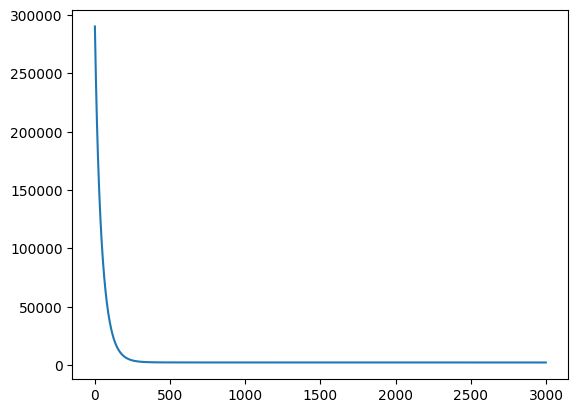

In [28]:
#Yassine Karimi
plt.plot(range(n_iterations), cost_history)
plt.show()

## 7. Evaluation du modèle - Coefficient de détermination
Le coefficient de détermination est un indice de la qualité de la prédiction de la régression linéaire. Le coefficient de détermination se situe entre 0 et 1. Plus il est proche de 1, plus la régression linéaire est en adéquation avec les données collectées

In [29]:
#Yassine Karimi
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [30]:
#Yassine Karimi
coef_determination(y, predictions)

0.9506820393455596